In [ ]:
import warnings
warnings.filterwarnings('ignore')
import keras
from keras.datasets import mnist
(x_treino,y_treino),(x_teste,y_teste) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
y_treino

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [ ]:
from keras.utils import np_utils
y_treino_convertido = np_utils.to_categorical(y_treino)
y_teste_convertido = np_utils.to_categorical(y_teste)

In [ ]:
y_treino_convertido

array([[0.00, 0.00, 0.00, ..., 0.00, 0.00, 0.00],
       [1.00, 0.00, 0.00, ..., 0.00, 0.00, 0.00],
       [0.00, 0.00, 0.00, ..., 0.00, 0.00, 0.00],
       ...,
       [0.00, 0.00, 0.00, ..., 0.00, 0.00, 0.00],
       [0.00, 0.00, 0.00, ..., 0.00, 0.00, 0.00],
       [0.00, 0.00, 0.00, ..., 0.00, 1.00, 0.00]], dtype=float32)

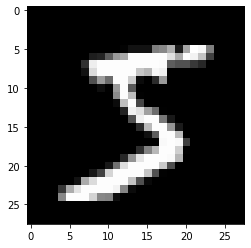

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_treino[0],cmap='gray')

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.optimizers import SGD

In [ ]:
x_treino_remodelado = x_treino.reshape((60000,784))
x_teste_remodelado = x_teste.reshape((10000,784))

In [ ]:
x_treino_normalizado = x_treino_remodelado.astype('float32')/255
x_teste_normalizado = x_teste_remodelado.astype('float32')/255

In [ ]:
x_treino_normalizado[0]

array([0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00,
       0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00,
       0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00,
       0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00,
       0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00,
       0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00,
       0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00,
       0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00,
       0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00,
       0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00,
       0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00,
       0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00,
       0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00,
       0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.

In [ ]:
modelo = Sequential()
modelo.add(Dense(30,input_dim=784,kernel_initializer='normal',activation='relu'))
modelo.add(Dense(30,kernel_initializer='normal',activation='relu'))
modelo.add(Dense(10,kernel_initializer='normal',activation='softmax'))

In [ ]:
otimizador = keras.optimizers.SGD()

In [ ]:
modelo.compile(loss='categorical_crossentropy',optimizer=otimizador,metrics=['acc'])

In [ ]:
historico = modelo.fit(x_treino_normalizado,y_treino_convertido,epochs=10,batch_size=100,validation_data=(x_teste_normalizado,y_teste_convertido),verbose=1)

Epoch 1/10
600/600 [==============================] - 2s 2ms/step - loss: 2.3002 - acc: 0.1347 - val_loss: 2.2810 - val_acc: 0.2730
Epoch 2/10
600/600 [==============================] - 1s 2ms/step - loss: 2.2518 - acc: 0.3231 - val_loss: 1.9506 - val_acc: 0.3989
Epoch 3/10
600/600 [==============================] - 1s 2ms/step - loss: 1.6956 - acc: 0.4784 - val_loss: 0.9880 - val_acc: 0.7370
Epoch 4/10
600/600 [==============================] - 1s 2ms/step - loss: 0.8586 - acc: 0.7634 - val_loss: 0.6030 - val_acc: 0.8213
Epoch 5/10
600/600 [==============================] - 1s 2ms/step - loss: 0.5901 - acc: 0.8213 - val_loss: 0.5110 - val_acc: 0.8454
Epoch 6/10
600/600 [==============================] - 1s 2ms/step - loss: 0.5106 - acc: 0.8504 - val_loss: 0.4609 - val_acc: 0.8641
Epoch 7/10
600/600 [==============================] - 1s 2ms/step - loss: 0.4639 - acc: 0.8676 - val_loss: 0.4259 - val_acc: 0.8751
Epoch 8/10
600/600 [==============================] - 1s 2ms/step - loss: 0.